In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
preexisting_path = "/Users/kristenhanold/Desktop/preexisting_us.csv"
nonexisting_path = "/Users/kristenhanold/Desktop/nonexisting_us.csv"

# Read the mouse data and the study results
preexisting_data = pd.read_csv(preexisting_path)
nonexisting_data = pd.read_csv(nonexisting_path)

In [4]:
# display table containing individuals with pre-existing conditions prior to covid
preexisting_data.head()

,study_id,redcap_survey_identifier,country,state_in_us,age,race_and_ethnicity,sex,gender_other,marital_status,living_with___1,...,sector_of_contribution___3,sector_of_contribution___4,sector_of_contribution___5,other,where_helped___1,where_helped___2,where_helped___3,where_helped___4,where_helped___5,other_where_helped
0,62,NaN,1.0,43.0,2.0,1.0,0.0,NaN,3.0,1,...,0,0,0,NaN,0,0,0,0,0,NaN
1,90,NaN,1.0,5.0,5.0,1.0,1.0,NaN,3.0,1,...,0,0,0,NaN,0,0,0,0,0,NaN
2,127,NaN,1.0,30.0,4.0,1.0,1.0,NaN,3.0,1,...,0,0,0,NaN,0,0,0,0,0,NaN
3,239,NaN,1.0,5.0,4.0,4.0,0.0,NaN,3.0,1,...,0,0,0,NaN,0,0,0,0,0,NaN
4,265,NaN,1.0,5.0,3.0,1.0,0.0,NaN,2.0,1,...,0,1,0,NaN,1,1,0,0,1,Single mothers and homeless community


In [5]:
# display table containing individuals with no pre-existing conditions prior to covid
nonexisting_data.head()

,study_id,redcap_survey_identifier,country,state_in_us,age,race_and_ethnicity,sex,gender_other,marital_status,living_with___1,...,sector_of_contribution___3,sector_of_contribution___4,sector_of_contribution___5,other,where_helped___1,where_helped___2,where_helped___3,where_helped___4,where_helped___5,other_where_helped
0,58,NaN,1.0,5.0,2.0,1.0,1.0,NaN,1.0,0,...,0,0,0,NaN,0,0,0,0,0,NaN
1,64,NaN,1.0,5.0,3.0,5.0,0.0,NaN,3.0,1,...,0,0,0,NaN,0,0,0,0,0,NaN
2,74,NaN,1.0,20.0,3.0,1.0,0.0,NaN,3.0,1,...,0,0,0,NaN,0,0,0,0,0,NaN
3,77,NaN,1.0,38.0,2.0,1.0,1.0,NaN,3.0,1,...,0,0,0,NaN,0,0,0,0,0,NaN
4,78,NaN,1.0,5.0,2.0,1.0,1.0,NaN,3.0,1,...,1,0,0,NaN,0,1,1,0,0,NaN


In [6]:
# counting the number of study-id's in the pre-existing conditions dataset
preexisting_count = len(preexisting_data['study_id'].value_counts())
preexisting_count_df = pd.DataFrame({
    'Total Participants with Pre-Existing Conditions': [preexisting_count]})

preexisting_count_df

,Total Participants with Pre-Existing Conditions
0,155


In [7]:
# counting the number of study-id's in the pre-existing conditions dataset
nonexisting_count = len(nonexisting_data['study_id'].value_counts())
nonexisting_count_df = pd.DataFrame({
    'Total Participants with No Pre-Existing Conditions': [nonexisting_count]})

nonexisting_count_df

,Total Participants with No Pre-Existing Conditions
0,827


In [9]:
# age demographics that had pre-existing conditions prior to covid
age_bins = [1, 2, 3, 4, 5, 6, 7]
group_names = ('18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '> 75')

# Creating a group based off of the bins
age_groups_df = preexisting_data.groupby("age")

total_count_existing = age_groups_df["age"].count()
percent_of_preexisting = round((total_count_existing / preexisting_count)*100, 2).map('{:.2f}%'.format)


preexisting_demographics_df = pd.DataFrame({
    'Total Count': total_count_existing,
    'Percentage of Indivuals with Pre-Existing Conditions': percent_of_preexisting
})

preexisting_demographics_df

######### CHANGE AGE COLUMN TO REFLECT LABEL NAMES############

,Total Count,Percentage of Indivuals with Pre-Existing Conditions
age,,
2.0,6,3.87%
3.0,20,12.90%
4.0,33,21.29%
5.0,51,32.90%
6.0,37,23.87%
7.0,8,5.16%


In [10]:
# age demographics that had no pre-existing conditions prior to covid
age_bins = [1, 2, 3, 4, 5, 6, 7]
group_names = ('18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '> 75')

# Creating a group based off of the bins
age_groups_df = nonexisting_data.groupby("age")

total_count_nonexisting = age_groups_df["age"].count()
percent_of_nonexisting = round((total_count_nonexisting / nonexisting_count)*100, 2).map('{:.2f}%'.format)


nonexisting_demographics_df = pd.DataFrame({
    'Total Count': total_count_nonexisting,
    'Percentage of Indivuals with No Pre-Existing Conditions': percent_of_nonexisting
})

nonexisting_demographics_df

######### CHANGE AGE COLUMN TO REFLECT LABEL NAMES############

,Total Count,Percentage of Indivuals with No Pre-Existing Conditions
age,,
1.0,56,6.77%
2.0,224,27.09%
3.0,165,19.95%
4.0,145,17.53%
5.0,157,18.98%
6.0,65,7.86%
7.0,15,1.81%


In [27]:
############## KEEP GETTING ERRORS. COME BACK TO THIS !!!!!!###############


# gender demographics based on pre-existing conditions

# female_count = 0
# male_count = 0
# other_count = 0
# transgender_count = 0

# # locate only the columns SN and Gender
# gender_df = preexisting_data.iloc[:, [6]]

# for row in gender_df:
#     if row == 0:
#         female_count += 1
#     elif row == 1:
#         male_count += 1
#     elif row == 2:
#         transgender_count += 1
#     elif row == 3:
#         other_count += 1
        
# female_count = 0
# male_count = 0
# other_count = 0
# transgender_count = 0

# # count each gender
# gender_count = gender_df['sex'].value_counts()
# gender_count

# # find percentage of each gender
# female_percent = round((female_count/preexisting_count)*100, 2)
# male_percent = round((male_count/preexisting_count)*100, 2)
# transgender_percent = round((transgender_count/preexisting_count)*100, 2)
# other_percent = round((other_count/preexisting_count)*100, 2)

# # create new data frame for gender analysis
# gender_existing_analysis = pd.DataFrame({
#     'Count Per Gender': [female_count, male_count, transgender_count, other_count],
#     'Percentage of Individuals': [female_percent, male_percent, transgender_percent, other_percent]
# })

# gender_existing_analysis

# locate only the columns SN and Gender
gender_df = preexisting_data.iloc[:, [6]]

# count each gender
gender_existing_count = gender_df['sex'].value_counts()

# find percentage of each gender
female_percent = round((gender_count['0.0']/preexisting_count)*100, 2)
male_percent = round((gender_count['1.0']/preexisting_count)*100, 2)
trangender_percent = round((gender_count['2.0']/preexisting_count)*100, 2)
other_percent = round((gender_count['3.0']/preexisting_count)*100, 2)
no_answer_percent = round((gender_count['4.0']/preexisting_count)*100, 2)

# create new data frame for gender analysis
gender_analysis = pd.DataFrame({
    " ":['Male', 'Female', 'Other / Non-Disclosed'],\
    'Count Per Gender': [gender_count[0], gender_count[1], gender_count[2]],\
    'Percentage of Players': [male_percent, female_percent, other_percent]
})
gender_analysis

KeyError: '0.0'

In [22]:
############## KEEP GETTING ERRORS. COME BACK TO THIS !!!!!!###############


# gender demographics based for no pre-existing conditions
female_count = 0
male_count = 0
other_count = 0
transgender_count = 0

# locate only the columns SN and Gender
gender_df = nonexisting_data.iloc[:, [6]]

for row in gender_df:
    if row == 0:
        female_count += 1
    elif row == 1:
        male_count += 1
    elif row == 2:
        transgender_count += 1
    elif row == 3:
        other_count += 1
        
# female_count = 0
# male_count = 0
# other_count = 0
# transgender_count = 0

# # count each gender
# gender_count = gender_df['sex'].value_counts()
# gender_count

# find percentage of each gender
female_percent = round((female_count/nonexisting_count)*100, 2)
male_percent = round((male_count/nonexisting_count)*100, 2)
transgender_percent = round((transgender_count/nonexisting_count)*100, 2)
other_percent = round((other_count/nonexisting_count)*100, 2)

# create new data frame for gender analysis
gender_nonexisting_analysis = pd.DataFrame({
    'Count Per Gender': [female_count, male_count, transgender_count, other_count],
    'Percentage of Individuals': [female_percent, male_percent, transgender_percent, other_percent]
})

gender_nonexisting_analysis

,Count Per Gender,Percentage of Individuals
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0


In [71]:
# top comorbidities individuals were diagnosed with prior to the rise of covid

# locate only the columns containing pre-existing diagnoses
top_comorbs_df = preexisting_data.loc[:, ['diabetes', 'cardiovascular_disorders', 'obesity',
                                          'respiratory_infections', 'respiratory_disorders_exam', 
                                          'gastrointestinal_disorders', 'chronic_kidney_disease', 
                                          'autoimmune_disease', 'chronic_fatigue_syndrome_a']]



# count each comorbidity
diabetes_count = top_comorbs_df['diabetes'].where(top_comorbs_df['diabetes'] == 1).sum()
cardio_count = top_comorbs_df['cardiovascular_disorders'].where(top_comorbs_df['cardiovascular_disorders'] == 1).sum()
obesity_count = top_comorbs_df['obesity'].where(top_comorbs_df['obesity'] == 1).sum()
respiratory_count = top_comorbs_df['respiratory_infections'].where(top_comorbs_df['respiratory_infections'] == 1).sum()
resp_disorder_count = top_comorbs_df['respiratory_disorders_exam'].where(top_comorbs_df['respiratory_disorders_exam'] == 1).sum()
gastro_count = top_comorbs_df['gastrointestinal_disorders'].where(top_comorbs_df['gastrointestinal_disorders'] == 1).sum()
kidney_count = top_comorbs_df['chronic_kidney_disease'].where(top_comorbs_df['chronic_kidney_disease'] == 1).sum()
autoimmune_count = top_comorbs_df['autoimmune_disease'].where(top_comorbs_df['autoimmune_disease'] == 1).sum()
fatigue_count = top_comorbs_df['chronic_fatigue_syndrome_a'].where(top_comorbs_df['chronic_fatigue_syndrome_a'] == 1).sum()


# find percentage of each gender
diabetes_percent = round((diabetes_count/preexisting_count)*100, 2)
cardio_percent = round((cardio_count/preexisting_count)*100, 2)
obesity_percent = round((obesity_count/preexisting_count)*100, 2)
respiratory_percent = round((respiratory_count/preexisting_count)*100, 2)
resp_disorder_percent = round((resp_disorder_count/preexisting_count)*100, 2)
gastro_percent = round((gastro_count/preexisting_count)*100, 2)
kidney_percent = round((kidney_count/preexisting_count)*100, 2)
autoimmune_percent = round((autoimmune_count/preexisting_count)*100, 2)
fatigue_percent = round((fatigue_count/preexisting_count)*100, 2)

# create a dictionary for analysis of prior diagnoses
comorbs_count_dict = {
    'Diabetes': diabetes_count,
    'Cardiovascular Disorders': cardio_count,
    'Obesity': obesity_count,
    'Respiratory Infections': respiratory_count,
    'Respiratory Disorders': resp_disorder_count,
    'Gastrointestinal Disorders': gastro_count,
    'Chronic Kidney Disease': kidney_count,
    'Autoimmune Disease': autoimmune_count,
    'Chronic Fatigue Syndrome': fatigue_count
}

# create a dictionary for analysis of prior diagnoses
comorbs_percent_dict = {
    'Diabetes': diabetes_percent,
    'Cardiovascular Disorders': cardio_percent,
    'Obesity': obesity_percent,
    'Respiratory Infections': respiratory_percent,
    'Respiratory Disorders': resp_disorder_percent,
    'Gastrointestinal Disorders': gastro_percent,
    'Chronic Kidney Disease': kidney_percent,
    'Autoimmune Disease': autoimmune_percent,
    'Chronic Fatigue Syndrome': fatigue_percent
}

# create new data frame to display dictionaries
comorbs_df = pd.DataFrame({
    'Count Per Comorbility': comorbs_count_dict,
    'Percentage of Total Population': comorbs_percent_dict
})

comorbs_df['Percentage of Total Population'] = comorbs_df['Percentage of Total Population'].map('{:.2f}%'.format)

comorbs_df

,Count Per Comorbility,Percentage of Total Population
Diabetes,155.0,100.00%
Cardiovascular Disorders,44.0,28.39%
Obesity,86.0,55.48%
Respiratory Infections,40.0,25.81%
Respiratory Disorders,42.0,27.10%
Gastrointestinal Disorders,33.0,21.29%
Chronic Kidney Disease,6.0,3.87%
Autoimmune Disease,25.0,16.13%
Chronic Fatigue Syndrome,4.0,2.58%


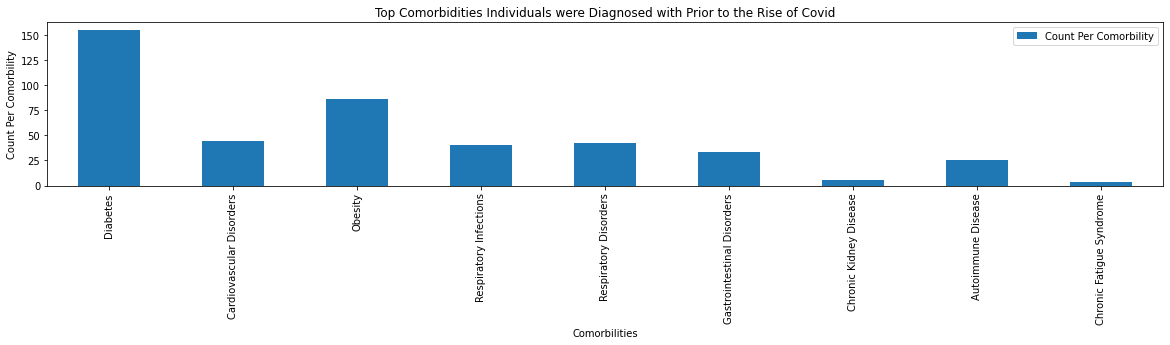

<Figure size 432x288 with 0 Axes>

In [72]:
# bar chart depicting the count per comorbility seen in above dataframe
comorbs_plot = comorbs_df.plot(kind = 'bar', figsize = (20, 3))

# Set a title for the chart
plt.title('Top Comorbidities Individuals were Diagnosed with Prior to the Rise of Covid')
plt.ylabel('Count Per Comorbility')
plt.xlabel('Comorbilities')

plt.show()
plt.tight_layout()

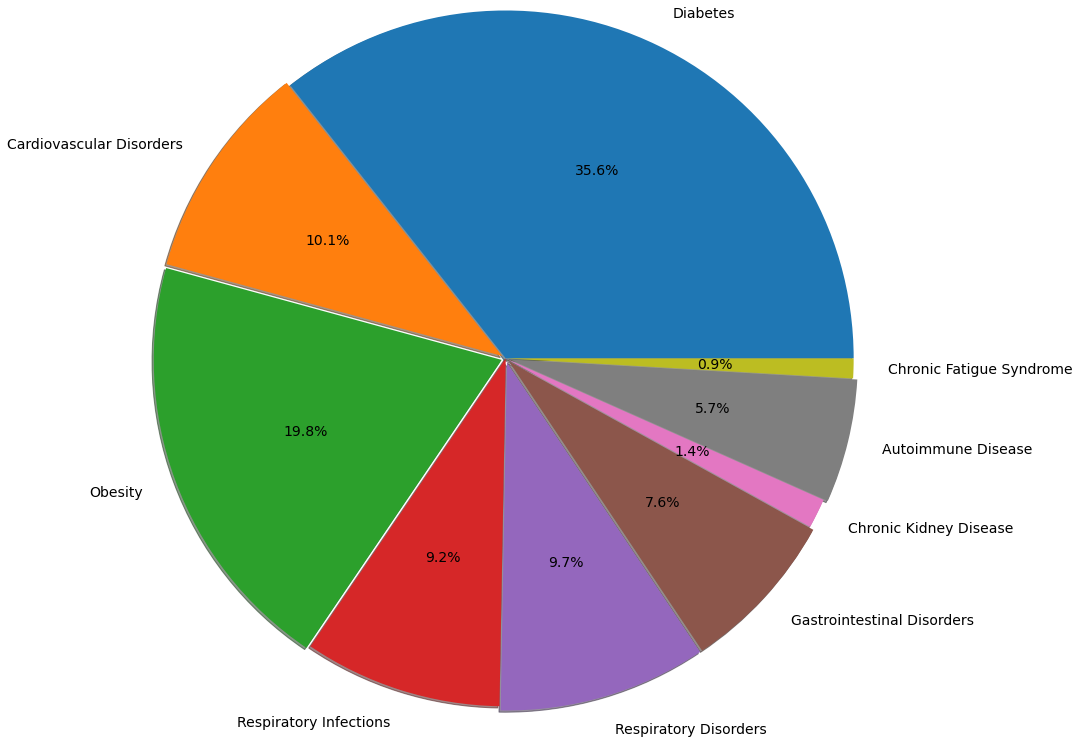

In [89]:
# pie chart comparing percentages of individuals with pre-existing
# num of comorbidities. ex: how many people have 1 diagnosis, 2 diagnoses, 3 diagnoses etc.
# sum each row and if row count is 

# # Get the Keys and store them in a list
# labels = list(comorbs_percent_dict.keys())

# # Get the Values and store them in a list
# values = list(comorbs_percent_dict.values())

# explode = (0, 0.05, 0.05, 0, 0.05, 0.05, 0, 0.05, 0)

# plt.pie(values, labels = labels, explode = explode, autopct="%1.1f%%", radius = 4, shadow = True, 
#         textprops={'fontsize': 14})
# plt.show()

In [95]:
# pie chart comparing individuals with pre-existing conditions and individuals with no pre-existing conditions

In [28]:
# individuals with top comorbidities that had a SOCIAL lifestyle change

In [90]:
# individuals with top comorbidities that had a PHYSICAL lifestyle change

In [ ]:
# individuals with top comorbidities that had a MENTAL lifestyle change 